<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session5/BMEN35_Ex13_deep_neural_networks_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks part 1

In this notebook we will load the data, scale the data, make a model using a Convolutional Neural Network and train it. This notebook contains quite a lot of code. Read it, run it and try to get an understanding of how it works. In these notebooks we will use the MNIST dataset (https://en.wikipedia.org/wiki/MNIST_database). It is a database of handwritten digits, has (originally) a training set of 60000 examples and a test set of 10000 examples. The images are greyscale images of 28x28 pixels.

Let's start with importing our usual suspects (modules/libraries) and a few new ones.

### Have some patience with this notebook as training may take some time

In [1]:
# The usual imports and a few others

import numpy as np
#from google.colab import files
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model



Now when all of that is done, we will load the dataset and check it out, format and scale the data appropriately. The dataset is available in Keras using `mnist.load_data()`.

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape : {:}, y_train shape {:}".format(X_train.shape, y_train.shape))
print("X_test shape : {:}, y_test shape {:}".format(X_test.shape, y_test.shape))


X_train shape : (60000, 28, 28), y_train shape (60000,)
X_test shape : (10000, 28, 28), y_test shape (10000,)


So, there are alot of examples here. like we stated earlier (60k for training and 10k for test). We will cheat a bit and not use the whole dataset (this is to save some time in training).

 We will also have a look at some of the examples.

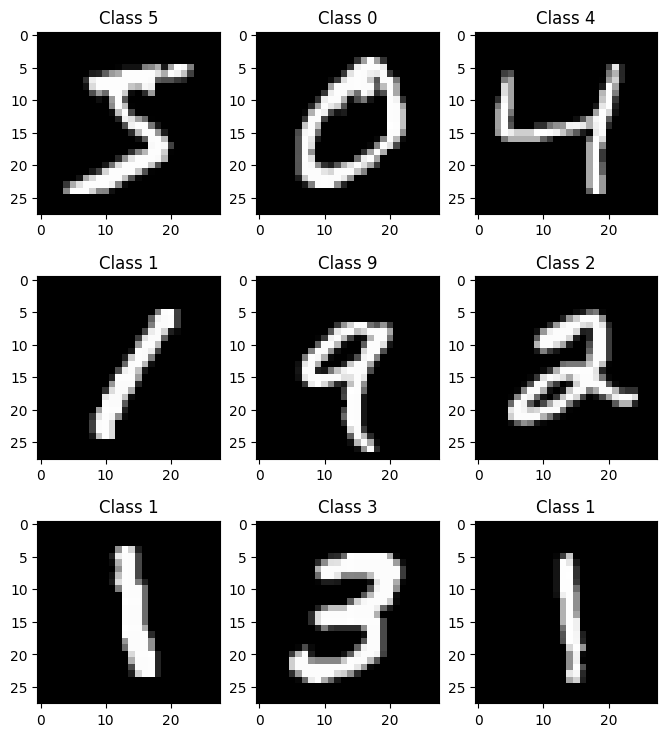

In [3]:
plt.figure(figsize=(8, 9))
for i in range(9):
  # define subplot
  plt.subplot(3,3,i+1)
  # plot raw pixel data
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.title("Class {}".format(y_train[i]))
# show the figure
plt.show()

Here we will select a subset of the data (10% each of test and train), reshape the data (to fit with Keras models we use later) and use one-hot encoding for the targets/classes.

In [4]:
# We will only use a subsection of the data to save some time in training,
# normally you would use the whole dataset
a = np.random.choice(60000, 6000, replace=False)
b = np.random.choice(10000, 1000, replace=False)
X_train = X_train[a,:,:]
y_train = y_train[a]
X_test = X_test[b,:,:]
y_test = y_test[b]


print(X_train.shape)
# Here we need to reshape the data to work with input layers
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

print(X_train.shape)
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# We will use one hot encoding for the target/classes values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(6000, 28, 28)
(6000, 28, 28, 1)


Next we will do some more formatting of the data. We will convert the data to floats (floating point representation) and scale the pixel values to be between 0 and 1.

In [5]:
# Cast to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

Now that all that is done, let's start with defining our model. We will use the Sequential API (`Sequential()` ) from Keras (https://keras.io/guides/sequential_model/). We will add some layers and define our optimiser, loss function and metrics to be saved. We will also make a plot to visualize our model.

In [6]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [8]:
# We will use the Sequential model
model = Sequential()
# We will add some layers to this model
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True) # This also generates a file of the plot

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Now we have defined our model, let's start with training. The fit method returns a history object where values for training loss and other metrics can be accessed.

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
188/188 [==============================] - 2s 8ms/step - loss: 0.4814 - accuracy: 0.8503
Epoch 2/10
188/188 [==============================] - 2s 8ms/step - loss: 0.2096 - accuracy: 0.9363
Epoch 3/10
188/188 [==============================] - 2s 8ms/step - loss: 0.1262 - accuracy: 0.9618
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0929 - accuracy: 0.9713
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0571 - accuracy: 0.9838
Epoch 6/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0399 - accuracy: 0.9910
Epoch 7/10
188/188 [==============================] - 1s 7ms/step - loss: 0.0300 - accuracy: 0.9928
Epoch 8/10
188/188 [==============================] - 1s 7ms/step - loss: 0.0221 - accuracy: 0.9955
Epoch 9/10
188/188 [==============================] - 1s 7ms/step - loss: 0.0142 - accuracy: 0.9980
Epoch 10/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0087 - accuracy: 0.99

Now the model is trained, we will check the results for both the training and test set. We will also save the model to the current workspace and download it to your computer.

In [10]:
train_results = model.evaluate(X_train, y_train, verbose=0)
print("Training accuracy is {:.4f} ".format(train_results[1]))
test_results = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy is {:.4f} ".format(test_results[1]))
# Lets also save our model
model.save('first_try.h5') # This saves the model as a file in the current workspace
#files.download( "first_try.h5" ) # This will download the model to your computer, if you are running this locally on your computer skip this line

Training accuracy is 1.0000 
Test accuracy is 0.9670 


In [12]:
y_hatt

82

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
y_hatt = np.argmax( model.predict(X_test),axis = 1)
y_true = np.argmax(y_test ,axis = 1)
print(classification_report(y_true,y_hatt))

32/32 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       111
           1       1.00      0.99      1.00       101
           2       0.92      0.95      0.94       111
           3       0.97      0.99      0.98        98
           4       0.99      0.97      0.98        93
           5       0.95      0.98      0.96        95
           6       0.96      0.93      0.95        92
           7       1.00      0.93      0.96       108
           8       0.96      0.96      0.96        94
           9       0.97      0.97      0.97        97

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



We can also plot some of the results, the loss and the accuracy.

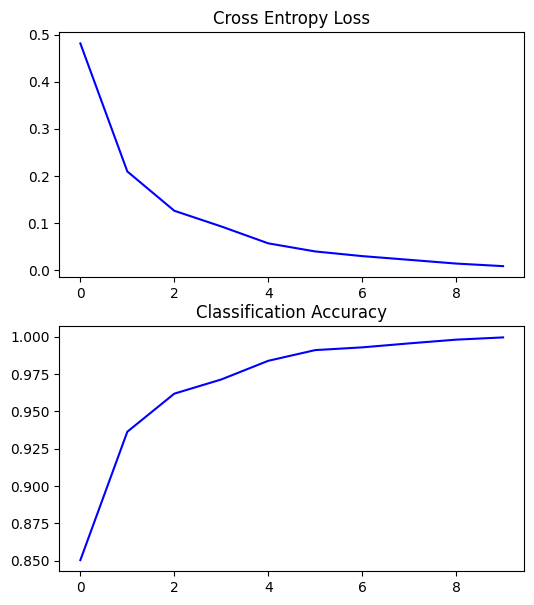

In [15]:
plt.figure(figsize=(6, 7))
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')

What we can add now, is to use cross-validation to estimate the accuracy. We will still use the same model. The training here will take some time so have patience.

In [16]:
n_folds = 5 # Number of folds
dataX = X_train
dataY = y_train
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
best_model = []
best_score = 0
for train_ix, test_ix in kfold.split(dataX):
  # define model
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  test_results = model.evaluate(testX, testY, verbose=0)
  print("Test accuracy is {:.4f} ".format(test_results[1]))
  # stores scores
  scores.append(test_results[1])
  histories.append(history)
  if test_results[1] > best_score:
    best_score = test_results[1]
    best_model = model

best_model.save('model_a.h5')
#files.download( "model_a.h5" ) # This will download the model to your computer, if you are running this locally on your computer skip this line
plot_model(best_model, show_shapes=True, show_layer_names=True, show_layer_activations=True) # This also generates a file of the plot
#best_model.summary()

Test accuracy is 0.9633 
Test accuracy is 0.9575 
Test accuracy is 0.9475 
Test accuracy is 0.9617 
Test accuracy is 0.9517 
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Now we have trained using five-fold cross validation. Lets plot the results

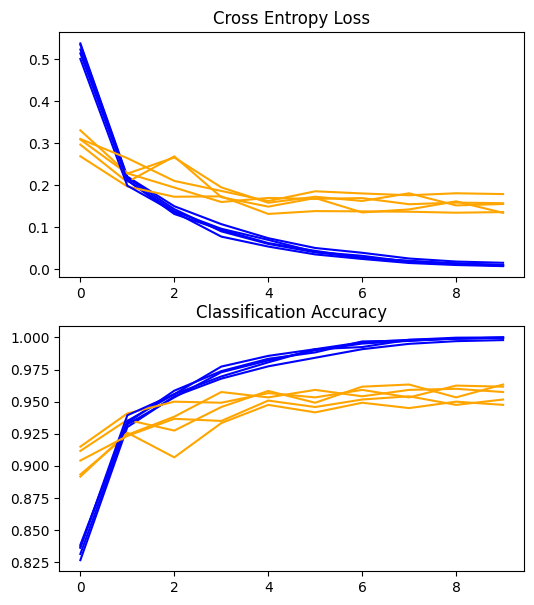

In [17]:
plt.figure(figsize=(6, 7))
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')



Finally, we can summarize the performance using a boxplot and by computing the mean and standard deviation of the scores.

Accuracy: mean= 95.6333 std= 0.5977, n= 5


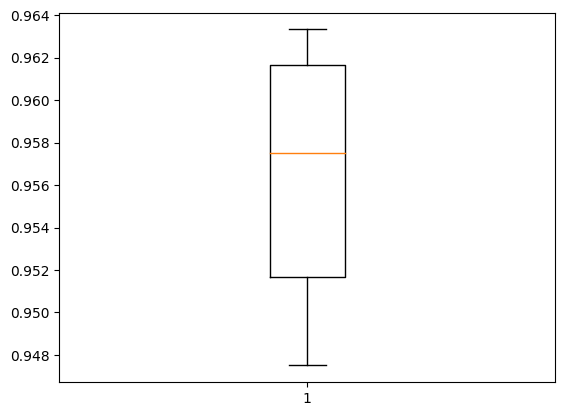

In [18]:
# print summary
print('Accuracy: mean= {:.4f} std= {:.4f}, n= {:d}'.format(mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

We will now train another model (which we will name model_b) and add batch normalisation layers. We will use the same procedure as before and use crossvalidation.


In [19]:
n_folds = 5
dataX = X_train
dataY = y_train
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
best_model = []
best_score = 0
for train_ix, test_ix in kfold.split(dataX):
  # define model
  model_b = Sequential()
  model_b.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model_b.add(BatchNormalization())
  model_b.add(MaxPooling2D((2, 2)))
  model_b.add(Flatten())
  model_b.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model_b.add(BatchNormalization())
  model_b.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model_b.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model_b.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  test_results = model_b.evaluate(testX, testY, verbose=0)
  print("Test accuracy is {:.4f} ".format(test_results[1]))
    # stores scores
  scores.append(test_results[1])
  histories.append(history)
  if test_results[1] > best_score:
    best_score = test_results[1]
    best_model = model_b


best_model.save('model_b.h5')
#files.download( "model_b.h5" ) # This will download the model to your computer, if you are running this locally on your computer skip this line
plot_model(best_model, show_shapes=True, show_layer_names=True, show_layer_activations=True) # This also generates a file of the plot
#best_model.summary()

Test accuracy is 0.9692 
Test accuracy is 0.9708 
Test accuracy is 0.9675 
Test accuracy is 0.9692 
Test accuracy is 0.9617 
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Now we have trained the models (model_b), selected the best one, saved it and now we can plot the results in a similar way as we did earlier.

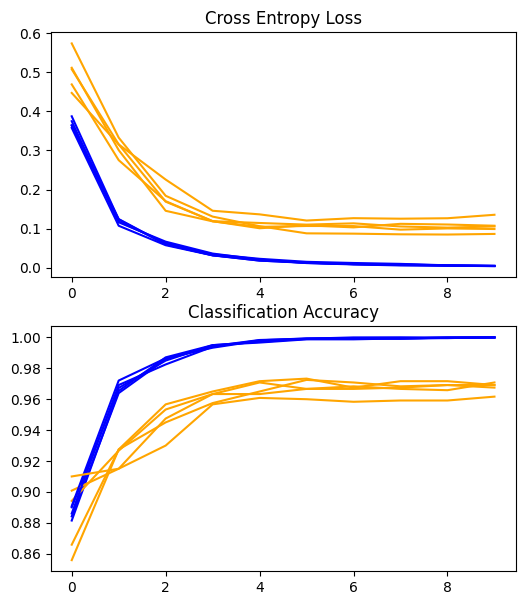

In [20]:
plt.figure(figsize=(6, 7))
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

Accuracy: mean= 96.7667 std= 0.3180, n= 5


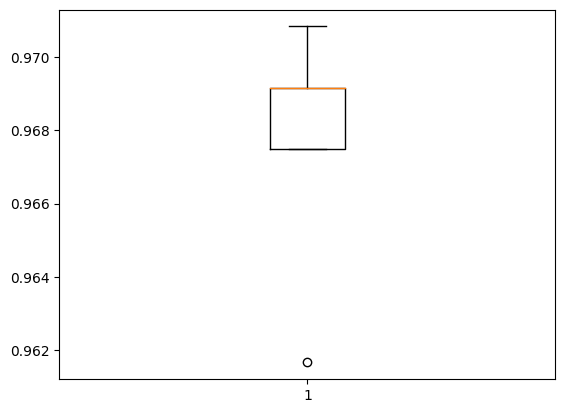

In [21]:
# print summary
print('Accuracy: mean= {:.4f} std= {:.4f}, n= {:d}'.format(mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

We will now train yet another model with another configuration of layers, this will be our "model c".

In [23]:
n_folds = 5
dataX = X_train
dataY = y_train
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
best_model = []
best_score = 0
for train_ix, test_ix in kfold.split(dataX):
  # define model
  model_c = Sequential()
  model_c.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model_c.add(MaxPooling2D((2, 2)))
  model_c.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model_c.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model_c.add(MaxPooling2D((2, 2)))
  model_c.add(Flatten())
  model_c.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model_c.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model_c.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model_c.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  test_results = model_c.evaluate(testX, testY, verbose=0)
  print("Test accuracy is {:.4f} ".format(test_results[1]))
    # stores scores
  scores.append(test_results[1])
  histories.append(history)
  if test_results[1] > best_score:
    best_score = test_results[1]
    best_model = model_c

#best_model.save('model_c.h5')
#files.download( "model_c.h5" ) # This will download the model to your computer, if you are running this locally on your computer skip this line
#plot_model(best_model, show_shapes=True, show_layer_names=True, show_layer_activations=True) # This also generates a file of the plot
#best_model.summary()

Test accuracy is 0.9742 
Test accuracy is 0.9733 
Test accuracy is 0.9700 
Test accuracy is 0.9833 
Test accuracy is 0.9717 


Now we have trained the models (model_c), selected the best one, saved it and now we can plot the results in a similar way as we did earlier.

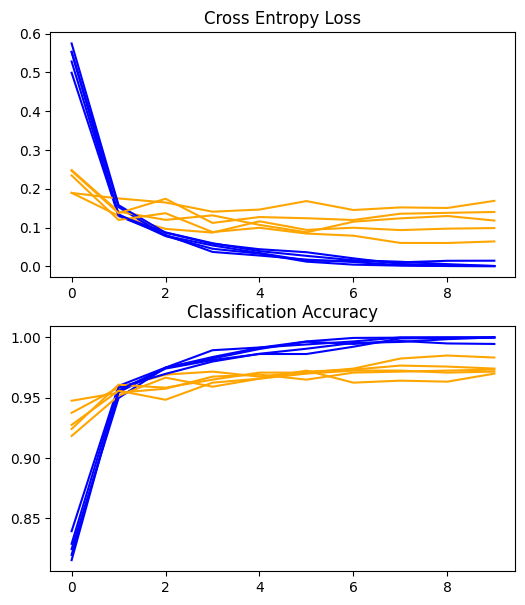

In [24]:
plt.figure(figsize=(6, 7))
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

Accuracy: mean= 97.4500 std= 0.4643, n= 5


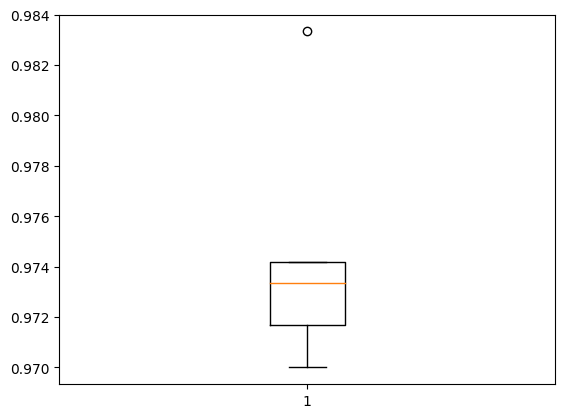

In [25]:
# print summary
print('Accuracy: mean= {:.4f} std= {:.4f}, n= {:d}'.format(mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

We will now train yet another model with another configuration of layers, here we will also use strides. This will be our "model d".

In [27]:
n_folds = 5
dataX = X_train
dataY = y_train
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
best_model = []
best_score = 0
for train_ix, test_ix in kfold.split(dataX):
  # define model
  model_d = Sequential()
  model_d.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model_d.add(Conv2D(8, (5, 5), activation='relu', kernel_initializer='he_uniform', strides=(2, 2)))
  model_d.add(Conv2D(12, (4, 4), activation='relu', kernel_initializer='he_uniform', strides=(2, 2)))
  model_d.add(Flatten())
  model_d.add(Dense(200, activation='relu', kernel_initializer='he_uniform'))
  model_d.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model_d.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model_d.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
  # evaluate model
  test_results = model_d.evaluate(testX, testY, verbose=0)
  print("Test accuracy is {:.4f} ".format(test_results[1]))
    # stores scores
  scores.append(test_results[1])
  histories.append(history)
  if test_results[1] > best_score:
    best_score = test_results[1]
    best_model = model_d

#best_model.save('model_d.h5')
#files.download( "model_d.h5" ) # This will download the model to your computer, if you are running this locally on your computer skip this line
plot_model(best_model, show_shapes=True, show_layer_names=True, show_layer_activations=True) # This also generates a file of the plot
#best_model.summary()

Test accuracy is 0.9492 
Test accuracy is 0.9592 
Test accuracy is 0.9317 
Test accuracy is 0.9533 
Test accuracy is 0.9542 
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Now we have trained the models (model_d), selected the best one, saved it and now we can plot the results in a similar way as we did earlier.


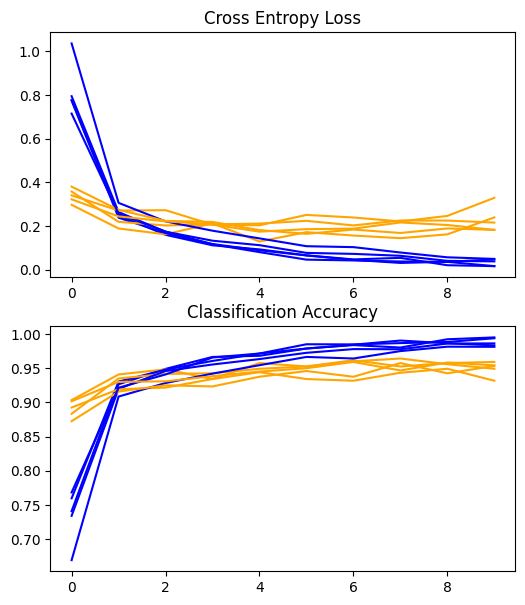

In [28]:
plt.figure(figsize=(6, 7))
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

Accuracy: mean= 94.9500 std= 0.9466, n= 5


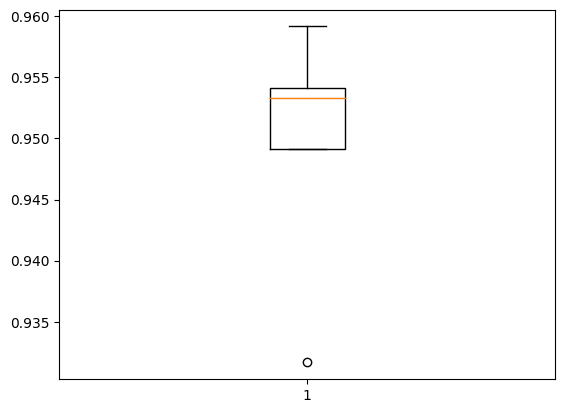

In [29]:
# print summary
print('Accuracy: mean= {:.4f} std= {:.4f}, n= {:d}'.format(mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

Next we will implement a one-layer network (similar to Logistic Regression).For this part we also need to reshape our data. This will be our "model e".


In [31]:
# We will also have to "reshape" our data
n_folds = 5
num_pixels = 784
dataX = X_train.reshape((X_train.shape[0], num_pixels))
dataY = y_train
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
best_model = []
best_score = 0
for train_ix, test_ix in kfold.split(dataX):
  # define model
  model_e = Sequential()
  model_e.add(Dense(10, input_dim=784, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model_e.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model_e.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model_e.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  test_results = model_e.evaluate(testX, testY, verbose=0)
  print("Test accuracy is {:.4f} ".format(test_results[1]))
    # stores scores
  scores.append(test_results[1])
  histories.append(history)
  if test_results[1] > best_score:
    best_score = test_results[1]
    best_model = model_e

#best_model.save('model_e.h5')
#files.download( "model_e.h5" ) # This will download the model to your computer, if you are running this locally on your computer skip this line
plot_model(best_model, show_shapes=True, show_layer_names=True, show_layer_activations=True) # This also generates a file of the plot
#best_model.summary()


Test accuracy is 0.9033 
Test accuracy is 0.9000 
Test accuracy is 0.8917 
Test accuracy is 0.8992 
Test accuracy is 0.8958 
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Now we have trained the models (model_e), selected the best one, saved it and now we can plot the results in a similar way as we did earlier. That was much quicker!

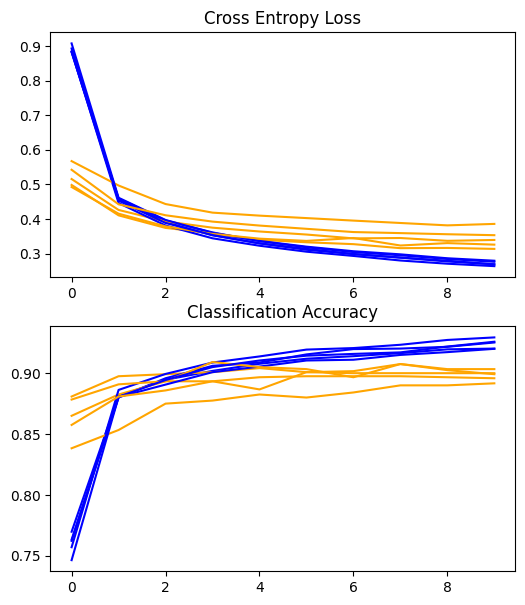

In [32]:
plt.figure(figsize=(6, 7))
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

Accuracy: mean= 89.8000 std= 0.3965, n= 5


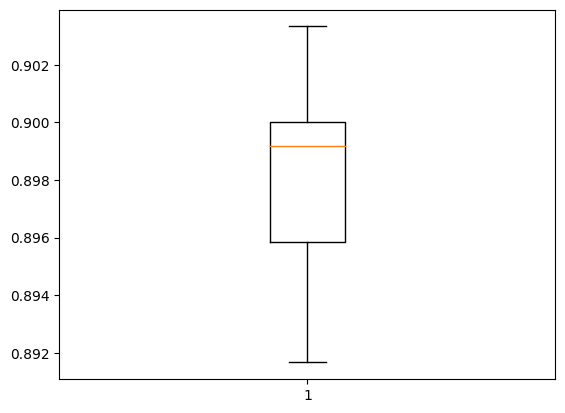

In [33]:
# print summary
print('Accuracy: mean= {:.4f} std= {:.4f}, n= {:d}'.format(mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

Now we will make simple neural network, similar to what you could do with MLPClassifier in sklearn. This will be our "model f". Also here we need to reshape the data.

In [34]:
# We will first have to "reshape" our data
n_folds = 5
num_pixels = 784
dataX = X_train.reshape((X_train.shape[0], num_pixels))
dataY = y_train
scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
best_model = []
best_score = 0
for train_ix, test_ix in kfold.split(dataX):
  # define model
  model_f = Sequential()
  model_f.add(Dense(200, input_dim=784, activation='relu'))
  model_f.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model_f.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model_f.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  test_results = model_f.evaluate(testX, testY, verbose=0)
  print("Test accuracy is {:.4f} ".format(test_results[1]))
    # stores scores
  scores.append(test_results[1])
  histories.append(history)
  if test_results[1] > best_score:
    best_score = test_results[1]
    best_model = model_f

#best_model.save('model_f.h5')
#files.download( "model_f.h5" ) # This will download the model to your computer, if you are running this locally on your computer skip this line
plot_model(best_model, show_shapes=True, show_layer_names=True, show_layer_activations=True) # This also generates a file of the plot
#best_model.summary()

Test accuracy is 0.9342 
Test accuracy is 0.9317 
Test accuracy is 0.9192 
Test accuracy is 0.9383 
Test accuracy is 0.9267 
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Now we have trained the models (model_f), selected the best one, saved it and now we can plot the results in a similar way as we did earlier. That was also relatively quick!

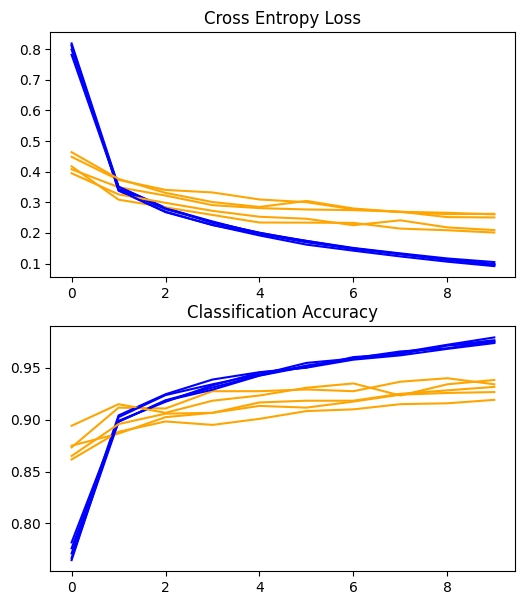

In [35]:
plt.figure(figsize=(6, 7))
for i in range(len(histories)):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

Accuracy: mean= 93.0000 std= 0.6604, n= 5


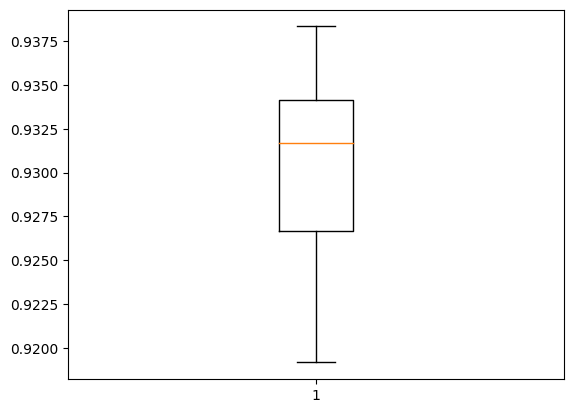

In [36]:
# print summary
print('Accuracy: mean= {:.4f} std= {:.4f}, n= {:d}'.format(mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

That is it for this notebook. Make sure you have downloaded models a - f to your computer as they will be used in the next notebook.

## The end